# Saurav Chaudhary

# Task # 4 - To Explore Decision Tree Algorithm

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
iris = pd.read_csv('Iris.csv', index_col = 0)

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# Checking for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(iris['Species'])
iris['Species']  = encoder.transform(iris['Species'])

In [7]:
X = iris.drop('Species', axis = 1)
y = iris['Species']

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


# Splitting data into train and test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [11]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

# Implementing Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = clf.predict(X_test)

# Accuracy Metrics

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [16]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[12  0  0]
 [ 0 12  4]
 [ 0  2 15]]


In [17]:
print('accuracy(in %): ', accuracy_score(y_test, y_pred)*100)

accuracy(in %):  86.66666666666667


In [18]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(33.0, 0.5, 'Truth')

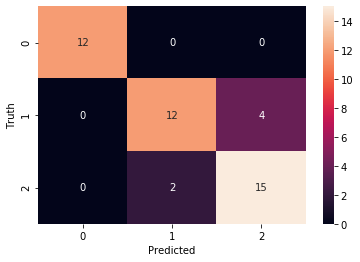

In [19]:
sn.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [20]:
print('classification report:\n', classification_report(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.75      0.80        16
           2       0.79      0.88      0.83        17

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.87      0.87      0.87        45



# Visualizing the Decision Tree

In [21]:
feature_cols = X.columns
target_cols = list(encoder.classes_)

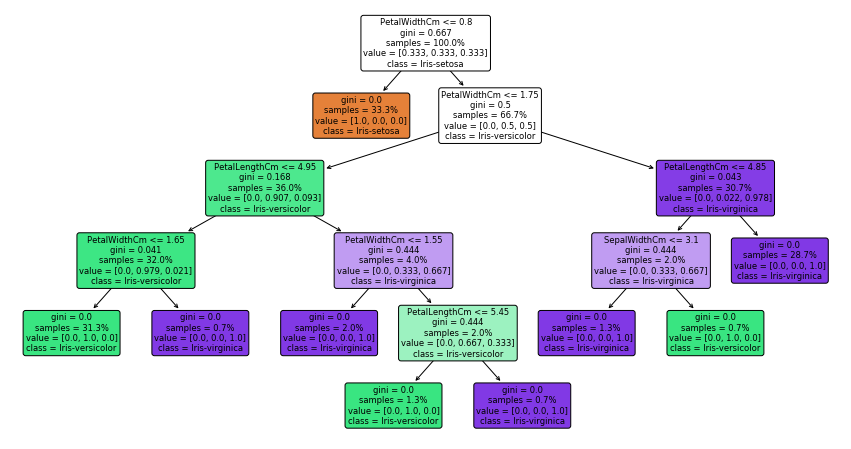

In [22]:
from sklearn import tree

plt.figure(figsize = (15,8))
tree.plot_tree(clf.fit(X, y), feature_names = feature_cols, class_names = target_cols, filled = True,
              precision = 3, proportion = True, rounded = True)
plt.show()